In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn, optim

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from qbstyles import mpl_style

mpl_style()
pd.options.display.float_format = "{:.4f}".format

In [44]:
colors = {"y": "white", "relu": "cyan", "tanh": "tomato", "sigmoid": "yellow"}

In [20]:
def fit(model, x, y, criterion, epochs=10, lr=0.001):
    x = torch.tensor(x, dtype=torch.float).reshape(-1, 1)
    y = torch.tensor(y, dtype=torch.float).reshape(-1, 1)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    accuracies = []
    
    for epoch in range(1, epochs + 1):
        model.train()
        cost = 0
        for i in range(x.shape[0]):
            yhat = model(x[i])
            loss = criterion(yhat, y[i])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            cost += loss.item()
        losses.append(cost / x.shape[0])
        
        model.eval()
        with torch.no_grad():
            y_pred = model(x)
            accuracy = r2_score(y, y_pred)
        accuracies.append(accuracy)
        
        print(f"Epochs {epoch}/{epochs}: loss = {losses[-1]:.4f}, {accuracy = :.4f}")
    
    print()
    print("=" * 20)
    print()
    return losses, accuracies


def predict(model, x):
    x = torch.tensor(x, dtype=torch.float).reshape(-1, 1)
    with torch.no_grad():
        y_pred = model(x)
    
    return y_pred.flatten()

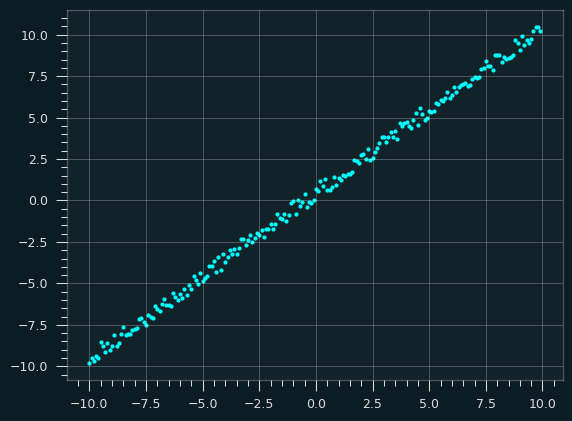

In [3]:
x = np.arange(-10, 10, 0.1)
noise = np.random.rand(len(x))
y = x + noise

plt.scatter(x, y, color='cyan', marker='.')

In [4]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,-10.0000,-9.7866
1,-9.9000,-9.4910
2,-9.8000,-9.6796
3,-9.7000,-9.3567
4,-9.6000,-9.4854


In [57]:
torch.manual_seed(42)
relu_model = nn.Sequential(
    nn.Linear(1, 1),
    nn.ReLU(),
    nn.Linear(1, 1),
)

torch.manual_seed(42)
tanh_model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Tanh(),
    nn.Linear(1, 1),
)

torch.manual_seed(42)
sigmoid_model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid(),
    nn.Linear(1, 1),
)

In [58]:
epochs = 50

relu_loss, relu_acc = fit(relu_model, x, y, nn.MSELoss(), epochs)
tanh_loss, tanh_acc = fit(tanh_model, x, y, nn.MSELoss(), epochs)
sigmoid_loss, sigmoid_acc = fit(sigmoid_model, x, y, nn.MSELoss(), epochs)

Epochs 1/50: loss = 19.1115, accuracy = 0.5144
Epochs 2/50: loss = 14.2531, accuracy = 0.6278
Epochs 3/50: loss = 11.1878, accuracy = 0.6997
Epochs 4/50: loss = 9.1690, accuracy = 0.7462
Epochs 5/50: loss = 7.8083, accuracy = 0.7773
Epochs 6/50: loss = 6.8565, accuracy = 0.7998
Epochs 7/50: loss = 6.1507, accuracy = 0.8176
Epochs 8/50: loss = 5.5840, accuracy = 0.8338
Epochs 9/50: loss = 5.0784, accuracy = 0.8505
Epochs 10/50: loss = 4.5698, accuracy = 0.8687
Epochs 11/50: loss = 4.0314, accuracy = 0.8872
Epochs 12/50: loss = 3.4862, accuracy = 0.9036
Epochs 13/50: loss = 3.0117, accuracy = 0.9163
Epochs 14/50: loss = 2.6306, accuracy = 0.9269
Epochs 15/50: loss = 2.3052, accuracy = 0.9358
Epochs 16/50: loss = 2.0302, accuracy = 0.9433
Epochs 17/50: loss = 1.7971, accuracy = 0.9498
Epochs 18/50: loss = 1.5983, accuracy = 0.9552
Epochs 19/50: loss = 1.4283, accuracy = 0.9599
Epochs 20/50: loss = 1.2829, accuracy = 0.9639
Epochs 21/50: loss = 1.1581, accuracy = 0.9673
Epochs 22/50: loss 

In [60]:
activation_losses = pd.DataFrame({
    "relu_losses": relu_loss,
    "tanh_losses": tanh_loss,
    "sigmoid_losses": sigmoid_loss,
})

activation_accuracies = pd.DataFrame({
    "relu_accuracies": relu_acc,
    "tanh_accuracies": tanh_acc,
    "sigmoid_accuracies": sigmoid_acc,
})

In [62]:
activation_losses.tail()

,relu_losses,tanh_losses,sigmoid_losses
45,0.2539,0.3935,2.1947
46,0.2461,0.3936,2.1257
47,0.2370,0.3938,2.0602
48,0.2300,0.3941,1.9978
49,0.2235,0.3944,1.9385


<Axes: >

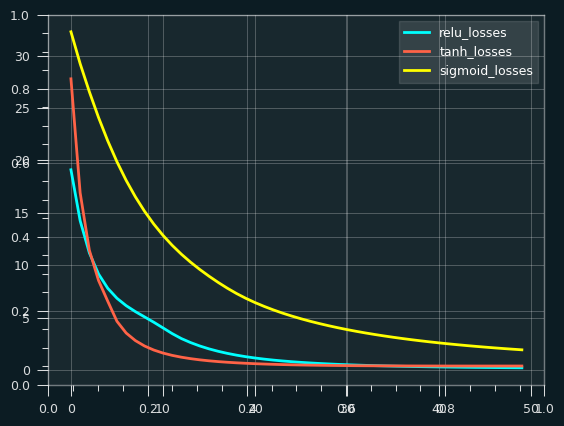

In [63]:
activation_losses.plot.line(color=["cyan", "tomato", "yellow"], linewidth=2)

In [64]:
activation_accuracies.tail()

,relu_accuracies,tanh_accuracies,sigmoid_accuracies
45,0.9926,0.8950,0.9153
46,0.9928,0.8950,0.9166
47,0.9931,0.8950,0.9178
48,0.9933,0.8950,0.9190
49,0.9934,0.8951,0.9201


<Axes: >

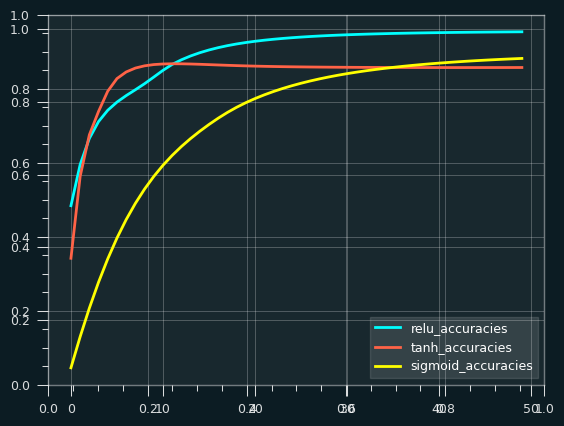

In [65]:
activation_accuracies.plot.line(
    color=["cyan", "tomato", "yellow"], 
    linewidth=2,
    # figsize=()
)

In [66]:
model_predictions = pd.DataFrame({
    "x": x,
    "y": y,
    "relu_model": predict(relu_model, x),
    "tanh_model": predict(tanh_model, x),
    "sigmoid_model": predict(sigmoid_model, x),
})

In [67]:
model_predictions.head()

,x,y,relu_model,tanh_model,sigmoid_model
0,-10.0000,-9.7866,-7.7535,-7.8232,-5.4280
1,-9.9000,-9.4910,-7.7535,-7.8182,-5.4256
2,-9.8000,-9.6796,-7.7535,-7.8131,-5.4231
3,-9.7000,-9.3567,-7.7535,-7.8077,-5.4205
4,-9.6000,-9.4854,-7.7535,-7.8019,-5.4177


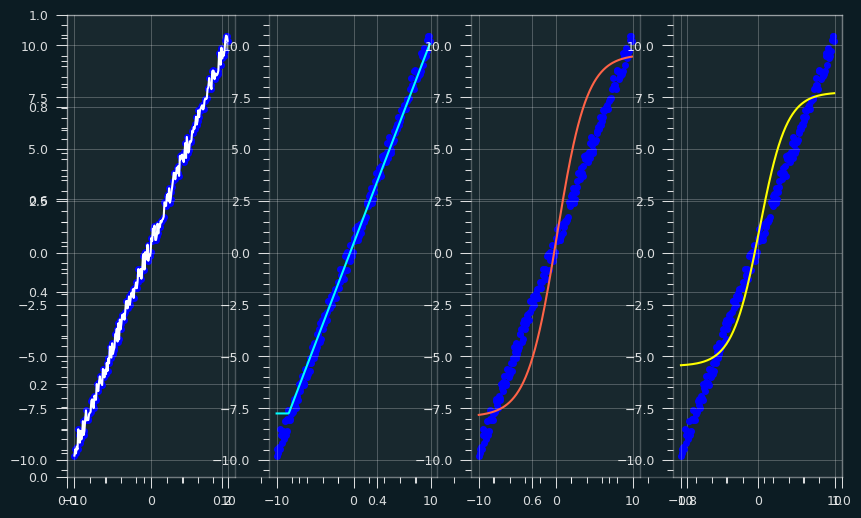

In [68]:
columns = model_predictions.columns[model_predictions.columns != 'x']

fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(10, 6))

for column, ax in zip(columns, axs.flatten()):
    ax.scatter(x, y, color="blue")
    ax.plot(x, model_predictions[column], color=colors[column.split('_')[0]])

In [69]:
model_accuracies = pd.Series({
    "relu_accuracy": r2_score(y, predict(relu_model, x)),
    "tanh_accuracy": r2_score(y, predict(tanh_model, x)),
    "sigmoid_accuracy": r2_score(y, predict(sigmoid_model, x)),
})

relu_accuracy      0.9934
tanh_accuracy      0.8951
sigmoid_accuracy   0.9201
dtype: float64


<Axes: >

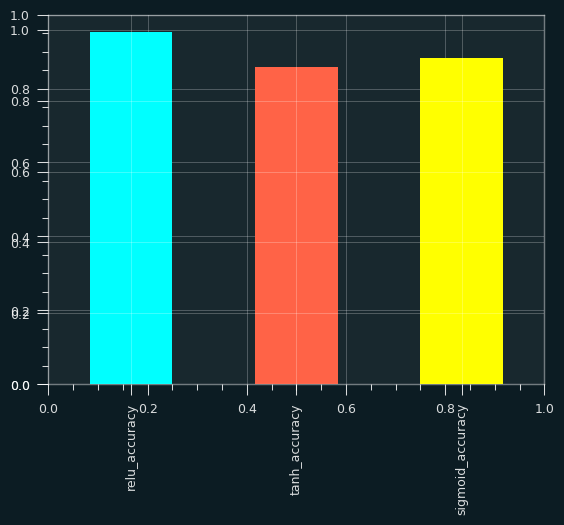

In [74]:
print(model_accuracies)
model_accuracies.plot.bar(color=["cyan", "tomato", "yellow"])